### Disclaimer: I hold no ownership over this notebook. This is documented by [Dr.Dhimant Ganatra](https://www.linkedin.com/in/dhimant-ganatra-3a6ba79/?originalSubdomain=in), my professor in R Programming

# Table of Contents:
1. [Simple Linear Regression](#section-one)
    - [SLR Model](#subsection-one)
    - [Validation of the SLR Model](#subsection-two)
    - [Diagnostic plots](#subsection-three)
2. [Multiple Linear Regression](#section-two)
    - [MLR Model](#subsection-four)
    - [Validation of the Multiple Regression Model](#subsection-five)
    - [Residual analysis](#subsection-six)
    - [Making predictions on the validation dataset](#subsection-seven)
    - [Cross-validation](#subsection-eight) 

<a id="section-one"></a>
# Simple Linear Regression

Simple Linear Regression (SLR) is a statistical technique for finding the existence of an association relationship between a dependent variable (response variable or outcome variable) and an independent variable (explanatory variable or predictor variable). Regression models do not establish a causal relationship between the dependent variable (Y) and the independent variable (X). In other words, using regression we cannot say that the value of Y depends on the value of X (or a change in the value of Y is caused due to a change in the value of X). We can only establish that the change in the value of Y is associated with the change in the value of X.

SLR implies that that there is only one independent variable in the model and the functional relationship between the dependent variable and the regression coefficient is linear. One of the functional forms of SLR is –

**Y**= b0+ b1**X** + e

where: <br>
b0 and b1 are known as the regression beta coefficients or parameters:
* 	b0 is the intercept of the regression line; that is the predicted value when X = 0
* 	b1 is the slope of the regression line
* e is the error term (also known as the residual errors), the part of Y that cannot be explained by the regression model


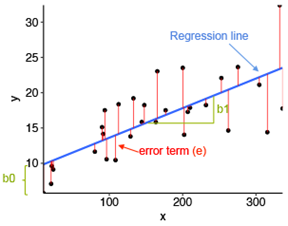

The regression parameters are estimated using the method of **Ordinary Least Squares (OLS)**. In ordinary least squares, the objective is to find the optimal value of b0 and b1 that will minimise the Sum of Squares Error (SSE). The equation is used to predict a quantitative outcome Y on the basis of one single predictor variable X. Once, we build a statistically significant model, it is possible to use it for predicting future outcome on the basis of new X values.

In [4]:
library(dplyr)
library(ggplot2)

location <- "Placement_Data_Full_Class.csv"
placement.df <- read.csv(location)

# select only relevant columns
colnames(placement.df)
placement.reg <- select(placement.df, degree_p, mba_p)
str(placement.reg)
placement.reg %>%  cor()


[1] "sl_no"          "gender"         "ssc_p"          "ssc_b"         
 [5] "hsc_p"          "hsc_b"          "hsc_s"          "degree_p"      
 [9] "degree_t"       "workex"         "etest_p"        "specialisation"
[13] "mba_p"          "status"         "salary"

'data.frame':	215 obs. of  2 variables:
 $ degree_p: num  58 77.5 64 52 73.3 ...
 $ mba_p   : num  58.8 66.3 57.8 59.4 55.5 ...


,degree_p,mba_p
degree_p,1.0000000,0.4023638
mba_p,0.4023638,1.0000000


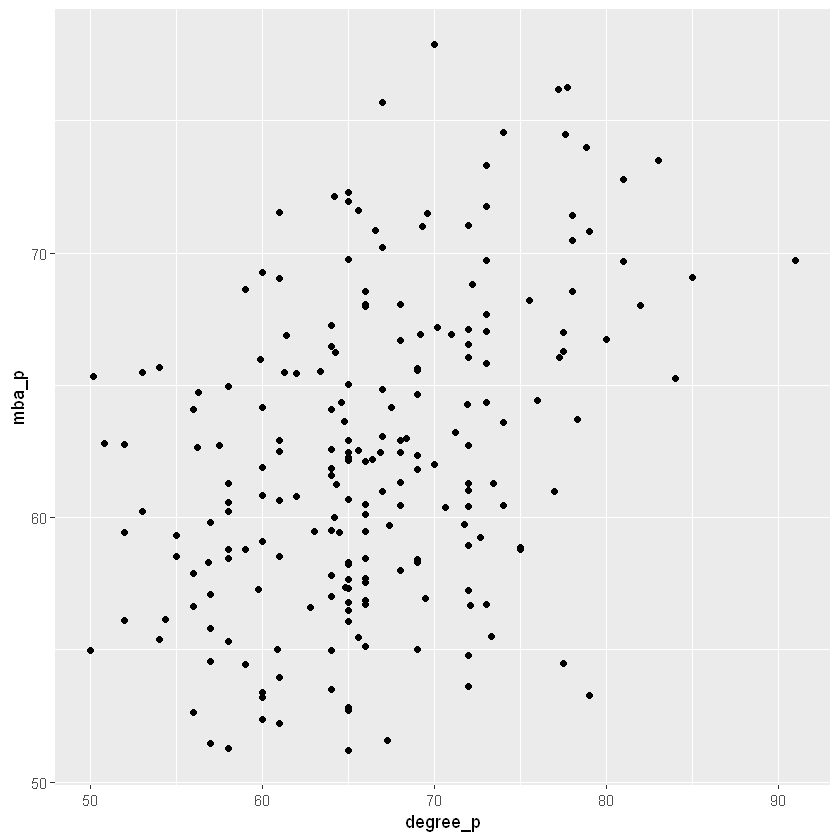

In [5]:
# Basic Visualisation
ggplot(placement.reg, aes(degree_p, mba_p)) +
  geom_point()

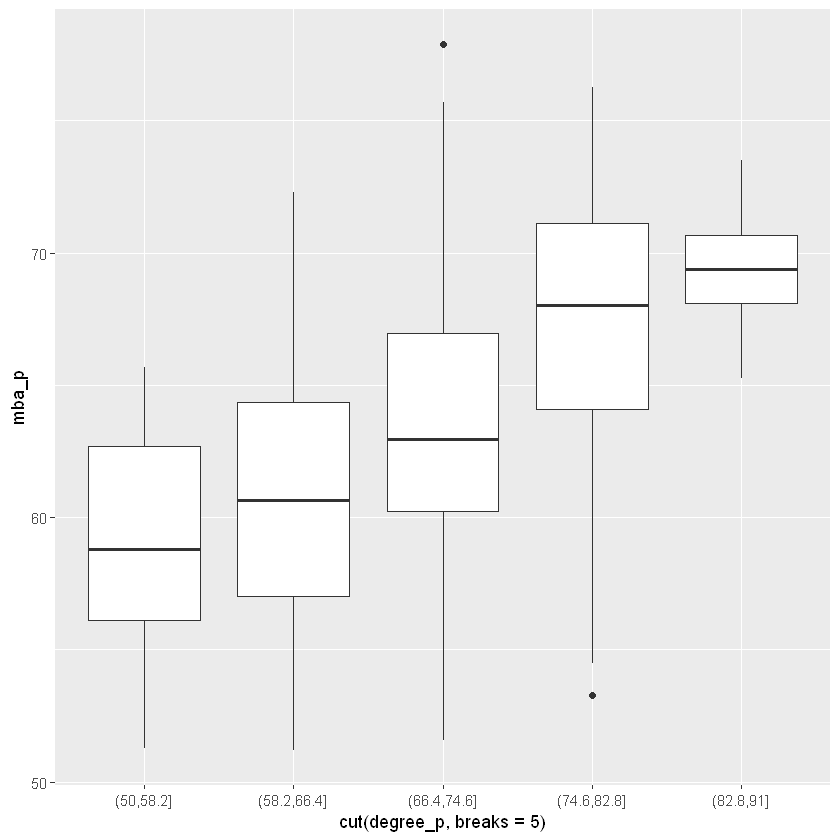

In [6]:
ggplot(placement.reg, aes(x = cut(degree_p, breaks = 5), y = mba_p)) +
  geom_boxplot()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



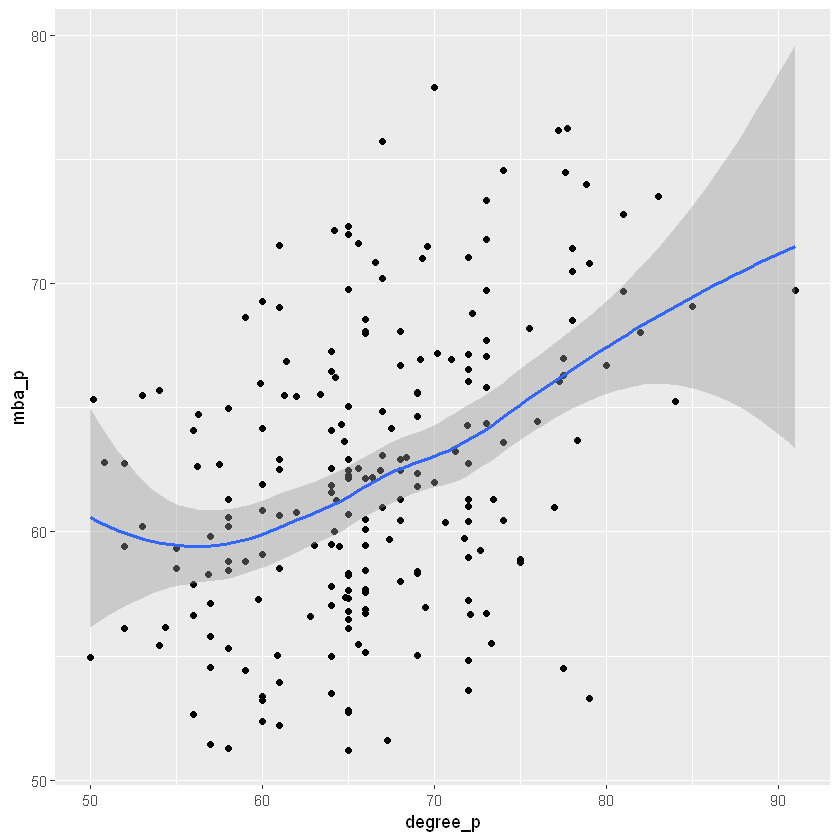

In [7]:
ggplot(placement.reg, aes(degree_p, mba_p)) +
  geom_point() + geom_smooth()

<a id="subsection-one"></a>
## SLR Model
The function lm() can be used to determine the beta coefficients of the linear model.


In [8]:
# model
# mba_p = b0 + b1*degree_p
model1 <- lm(mba_p~degree_p, data = placement.reg)
model1


Call:
lm(formula = mba_p ~ degree_p, data = placement.reg)

Coefficients:
(Intercept)     degree_p  
     41.109        0.319  


From the output, the estimated values of b0 and b1 are: b0 = 41.109 and b1 = 0.319

## Regression equation:
The corresponding regression equation is given by- <br>
**mba_p = 41.109 + 0.319*degree_p **

## Interpretation of SLR coefficients: 
The equation is interpreted as follows- For every one percentage increase in degree percent, the MBA percent will increase by 0.319% on an average.

## Plotting the regression line:

`geom_smooth()` using formula 'y ~ x'



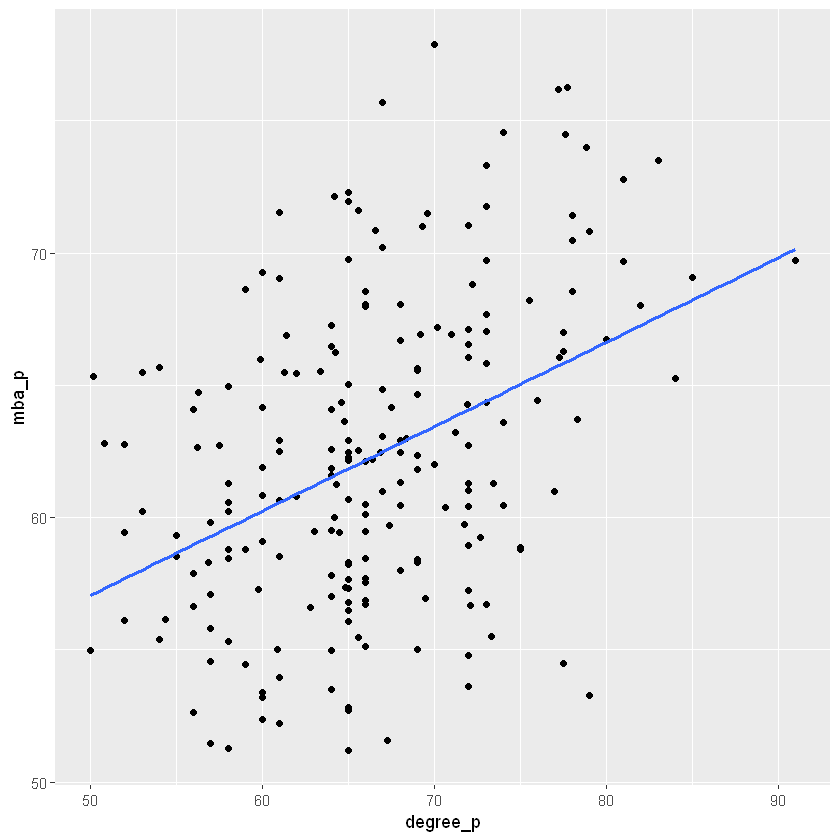

In [9]:
# Regression line
ggplot(placement.reg, aes(degree_p, mba_p)) +
  geom_point() + geom_smooth(method = "lm", se = FALSE)

<a id="subsection-two"></a>
## Validation of the SLR Model

It is important to validate the regression model to ensure its validity and goodness of fit before it can be used for practical applications. The following measures are used to validate the SLR model:
1.	Coefficient of determination (R-square)
2.	Hypothesis test for the regression coefficient (b1)
3.	Analysis of Variance for overall model validity (relevant for MLR)
4.	Residual analysis to validate the regression model assumptions
5.	Outlier analysis

We start by displaying the statistical summary of the model using the function summary().


In [10]:
# Model assessment
summary(model1)


Call:
lm(formula = mba_p ~ degree_p, data = placement.reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0166  -3.9567  -0.0328   3.6580  14.4540 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.10877    3.32040  12.381  < 2e-16 ***
degree_p     0.31896    0.04973   6.414 8.99e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.353 on 213 degrees of freedom
Multiple R-squared:  0.1619,	Adjusted R-squared:  0.158 
F-statistic: 41.15 on 1 and 213 DF,  p-value: 8.993e-10


In [8]:
# Characteristics
mba_p.hat <- fitted.values(model1)
head(mba_p.hat)

1        2        3        4        5        6 
59.60843 65.82177 61.52219 57.69468 64.48852 62.55881

In [9]:
head(placement.reg$mba_p)

[1] 58.80 66.28 57.80 59.43 55.50 51.58

In [10]:
mean(mba_p.hat) == mean(placement.reg$mba_p) #should be same

[1] TRUE

In [11]:
mod1residual <- residuals(model1)
head(mod1residual)

1           2           3           4           5           6 
 -0.8084339   0.4582309  -3.7221922   1.7353243  -8.9885175 -10.9788112

In [12]:
mean(mod1residual) #should be zero
sum(mod1residual) #should be zero

[1] -2.909494e-17

[1] -6.165207e-15

## Coefficient of Determination (R-square or R2)

The coefficient of determination measures the percentage of variation in Y explained by the model. That is, R2 is the proportion of variation in the response variable explained by the regression model. The value of R2 lies between 0 and 1. Higher values of R2 implies better fit. There is no minimum threshold for R2, however a minimum value of R2 for a given significance value (α) can be derived using the relationship between the F-statistic and R2. Mathematically, for SLR the R-square is square of the Pearson correlation coefficient. <br>
In our example, the R-square value is 0.1619, meaning that the model explains 16.19% of the variation in MBA percentage. The remaining variation is due to other factors that were not included in the model.<br>
**Note:** A high R-square value is not necessarily a good indicator of the correctness of the model; it could be a spurious relationship. The adjusted R-squared is a statistic that modifies R2 by incorporating the sample size and number of explanatory variables.

## Hypothesis test for regression coefficient (t-Test)

The regression coefficient b1 captures the existence of a linear relationship between the response variable and the explanatory variable. If b1 = 0, we can conclude that there is no statistically significant linear relationship between the two variables. <br>
The null and alternative hypothesis for the SLR model can be stated as follows:
* Null: There is no relationship between X and Y (b1 = 0)
* Alternative: There is a relationship between X and Y (b1 ≠ 0)

In our example, since the p-value for degree_p is less than 0.05, we reject the Null and conclude that there is significant evidence suggesting a linear relationship between degree_p (X) and mba_p (Y).

## Test for Overall Model: ANOVA (F-test)

Using ANOVA, we can test whether the overall model is statistically significant. However, for a SLR, the null and alternative hypothesis in ANOVA and t-test are exactly same and thus there will be no difference in the p-value.
The Null and Alternative hypothesis for F-test are given by-<br>
* **Null:** There is no statistically significant relationship between Y and any of the explanatory variables (i.e all regression coefficients are zero)
* **Alternative:** Not all regression coefficients are zero

## Residual analysis

The difference between the observed value of the dependent variable (Y) and the predicted value (Y ̂, Y-hat) is called the residual (error). Each data point has one residual. Residual analysis is important to check whether the assumptions of regression models have been satisfied. It is performed to check the following-
* 	The functional form of regression is correctly specified
* 	The residuals (Y- Y ̂) are normally distributed
* 	The variance of the residuals is constant (homoscedasticity)
* 	If there are any outliers <br>
Regression diagnostic plots are used to check on the above.

## Plotting the residuals: 
Each vertical red segments represents the residual error between an actual value and the corresponding predicted (i.e. fitted) value.

`geom_smooth()` using formula 'y ~ x'



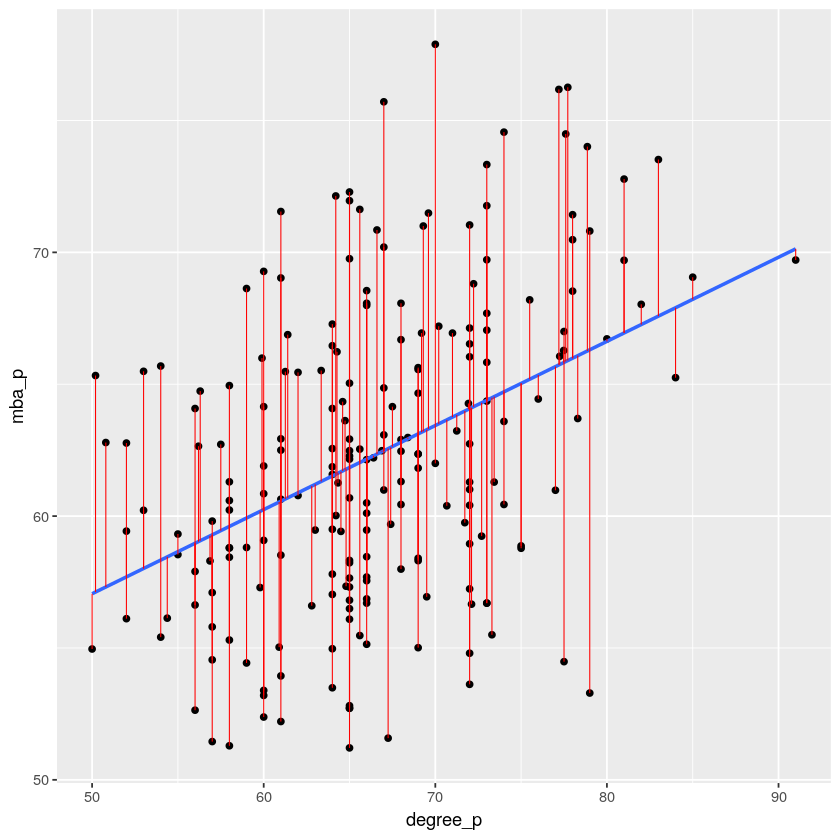

In [13]:
# Highlighting the Residuals
ggplot(placement.reg, aes(degree_p, mba_p)) +
  geom_point() + geom_smooth(method = "lm", se = FALSE) +
  geom_segment(aes(xend = degree_p, yend = mba_p.hat), color = "red", size = 0.3)

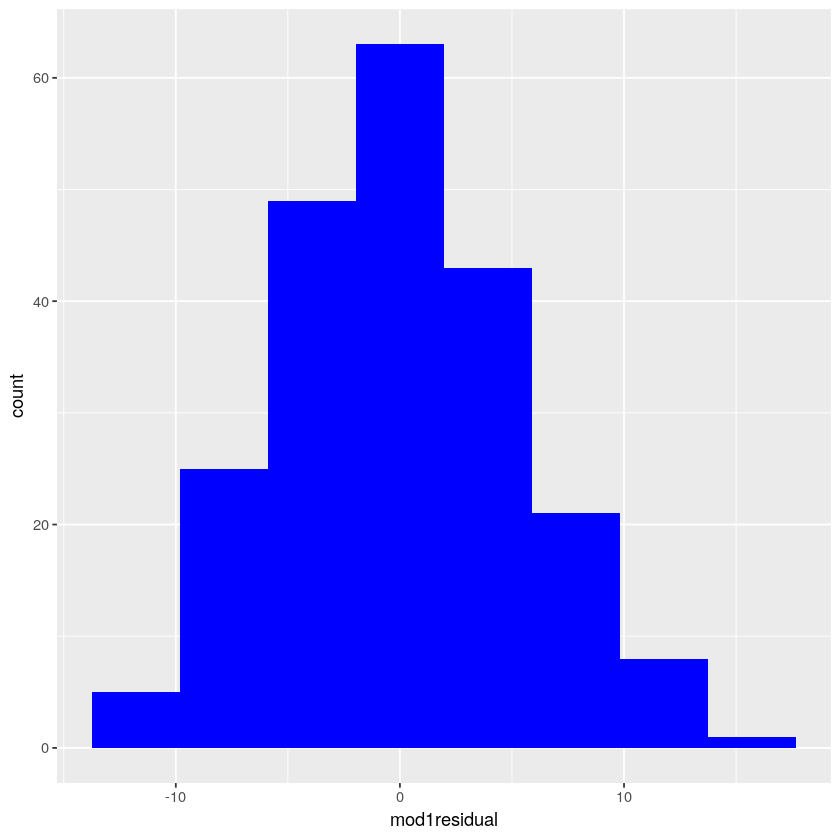

In [14]:
# Histogram of residuals for understanding
residual.df <- as.data.frame(mod1residual)
ggplot(residual.df,aes(mod1residual)) +  geom_histogram(bins = 8, fill='blue')

<a id="subsection-three"></a>
## Diagnostic plots: 
Regression diagnostics plots can be created using the R base function plot(). The diagnostic plots show residuals in four different ways.

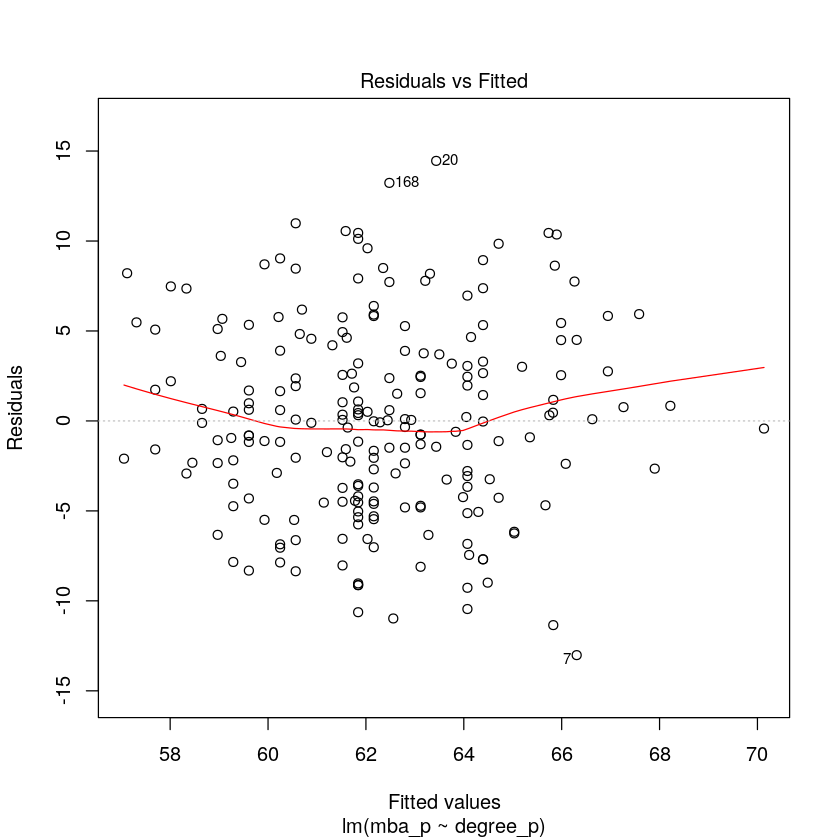

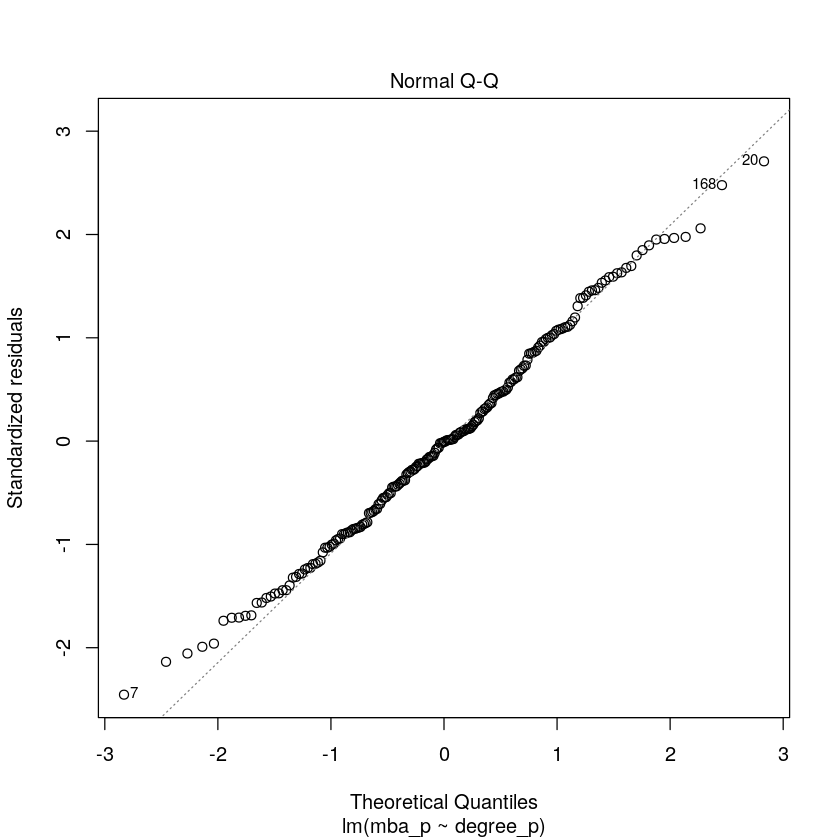

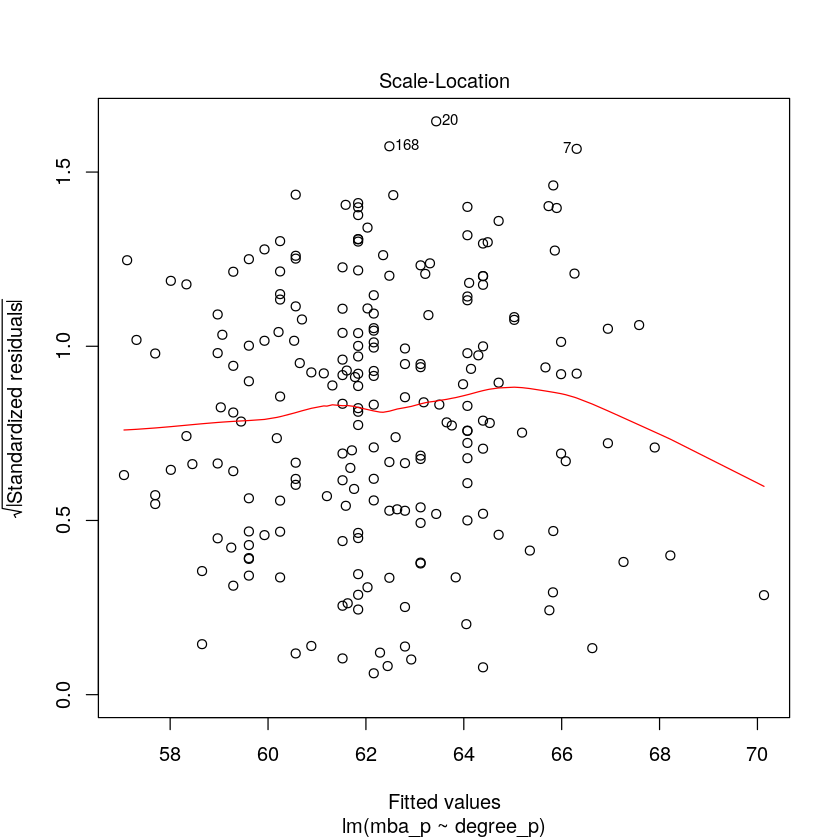

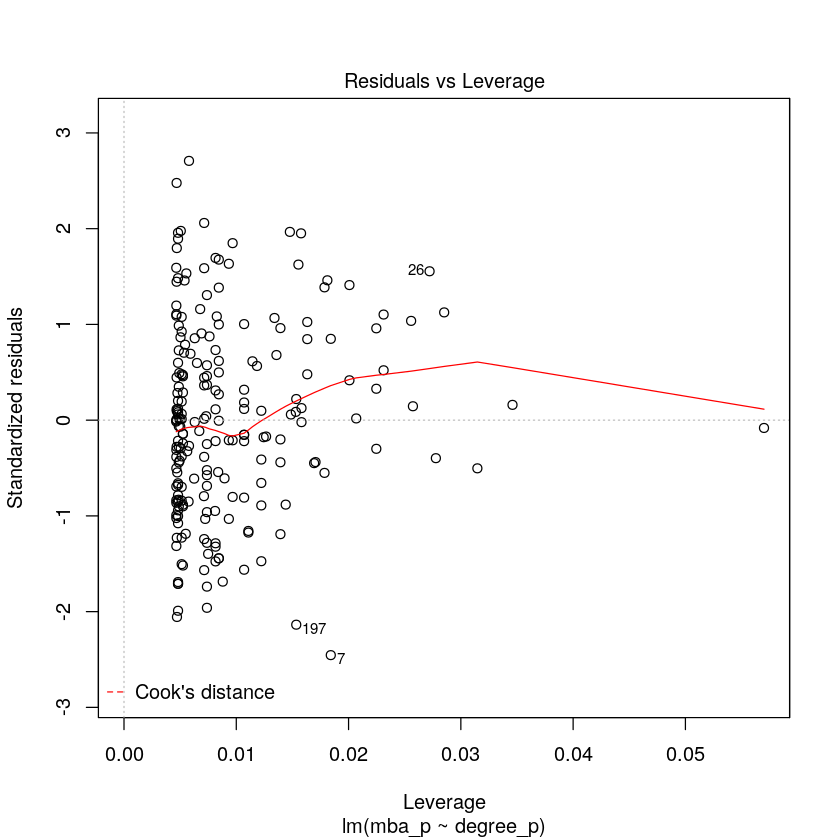

In [15]:
# Diagnostic Plots
plot(model1)

**Note:** The four plots show the top 3 most extreme data points labelled with the row numbers of the data in the data set. You might want to take a close look at them individually to check if there is anything special for the observation. The standardized residual is the residual divided by its standard deviation.

## Residuals vs Fitted:
Used to check the linear relationship assumption. An approximately horizontal line (red line), without distinct patterns is an indication for a linear relationship. Any pattern in the residual plot would indicate incorrect specification of the model.<br>
In our example, there is no pattern in the residual plot. This suggests that we can assume linear relationship between the predictor (degree_p) and the outcome variable (mba_p).<br>
**Note:** If the residual plot indicates a non-linear relationship in the data, then a simple approach is to use non-linear transformations of the predictors, such as log(X), sqrt(X) and X2, in the regression model. 

## Normal Q-Q: 
Used to examine whether the residuals are normally distributed. It is good if residuals points follow the straight dashed line.<br>
In our example, most of the points fall approximately along the reference line, so we can assume normality. Thus the hypothesis tests (t and F) are valid.<br>
**Note:** If the residual plot does not follow approximately normal distribution it puts a doubt on the validity of the model itself since we cannot trust the outcome of the hypothesis tests (p-value).

## Scale-Location(or)Spread-Location:
Used to check the homogeneity of variance of the residuals (homoscedasticity). This plot shows if residuals are spread equally along the ranges of the predictors. Failure to meet this assumption will result in unreliability of the hypothesis tests. It is good if you see a horizontal line with equally spread points.   Horizontal line with equally spread points is a good indication of homoscedasticity.<br>
**Note:** If there is heteroscedasticity then we can expect a funnel type shape in the residual plot. A funnel shape indicates that the variance of the residuals depends on the value of independent variable (X).

## Residuals vs Leverage: 
Used to identify influential cases, that is, extreme values that might influence the regression results when included or excluded from the analysis. 

## Outliers: 
Outliers are observations whose values show a large deviation from the mean value, that is (Y- Y ̅) is large. That is, an outlier is a data point whose response Y does not follow the general trend of the rest of the data. Presence of an outlier can have a significant influence on values of regression coefficients. Observations whose standardized residuals are greater than 3 in absolute value are possible outliers. In our example, there are no outliers which exceed 3 standard deviations.

## High Leverage points: 
A data point has high leverage if it has extreme predictor X values. Leverage value of an observation measures the influence of that observation on the overall fit of the regression function. Leverage value of more than 3(p+1)/n is treated as highly influential. In our example, there are a few high leverage points (leverage greater than 0.028). Mostly, the observations with high leverage and high residuals can be removed from the data set.<br>

Outliers and high leverage data points have the potential to be influential, but we generally have to investigate further to determine whether or not they are actually influential. Not all outliers (or extreme data points) are influential in linear regression analysis. A metric called Cook’s distance is used to determine the influence of a value. This metric defines influence as a combination of leverage and residual size. <br>
In our example, the data don’t present any influential points. Cook’s distance lines (a red dashed line) are not shown on the Residuals vs Leverage plot because all points are well inside of the Cook’s distance lines. When data points have high Cook’s distance scores they are generally located at the upper right or lower right corner of the leverage plot. We can also see the cook’s distance plot using the below code. By default, the top 3 most extreme values are labelled on the Cook’s distance plot.


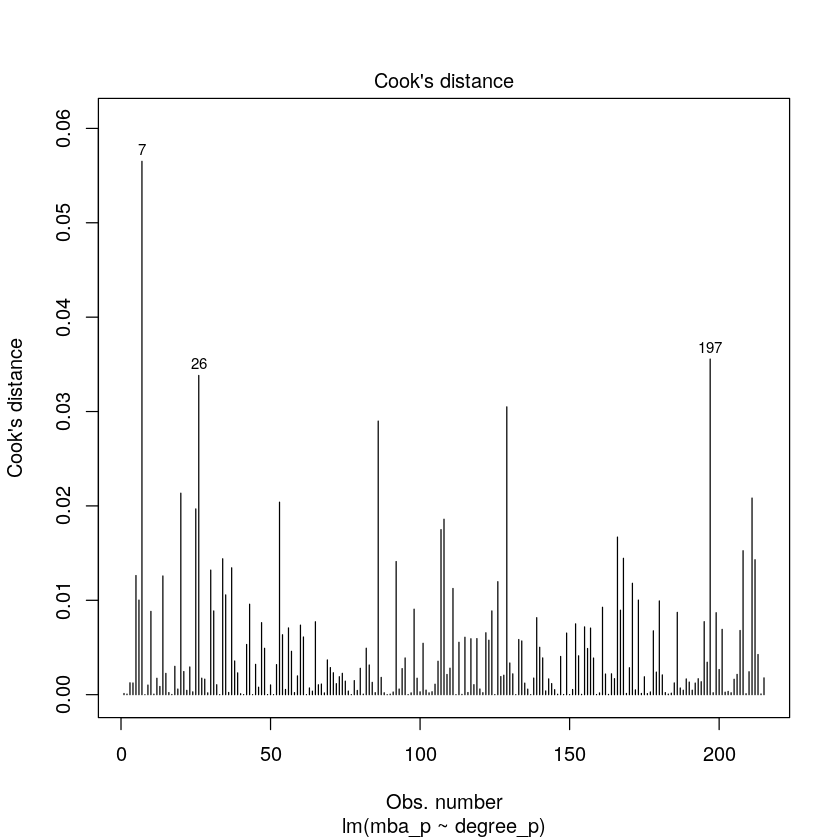

In [16]:
# Cook's distance
plot(model1, 4)

<a id="section-two"></a>
# Multiple Linear Regression

Multiple Linear Regression (MLR) is a statistical technique for finding existence of an association relationship between a dependent variable (response variable or outcome variable) and several independent variables (explanatory variable or predictor variable). The functional form of MLR is given by-

**Y = b0 + b1*X1 + b2*X2 + …. + bp*Xp + e**

where,
Y is the dependent variable, X1, X2 … Xp are independent variables, b0 is a constant, b1, b2 … bp are the partial regression coefficients corresponding to the explanatory variables and e is the error term (residual).<br>

In MLR the regression coefficients are called partial regression coefficients since the relationship between an explanatory variable and the response variable is calculated after removing (partial out) the effect of all the other explanatory variables in the model.


In [17]:
# select only relevant columns
colnames(placement.df)
placement.mlr <- placement.df %>% select(ends_with("_p"), -etest_p)
colnames(placement.mlr)
str(placement.mlr)

[1] "sl_no"          "gender"         "ssc_p"          "ssc_b"         
 [5] "hsc_p"          "hsc_b"          "hsc_s"          "degree_p"      
 [9] "degree_t"       "workex"         "etest_p"        "specialisation"
[13] "mba_p"          "status"         "salary"

[1] "ssc_p"    "hsc_p"    "degree_p" "mba_p"

'data.frame':	215 obs. of  4 variables:
 $ ssc_p   : num  67 79.3 65 56 85.8 ...
 $ hsc_p   : num  91 78.3 68 52 73.6 ...
 $ degree_p: num  58 77.5 64 52 73.3 ...
 $ mba_p   : num  58.8 66.3 57.8 59.4 55.5 ...


,ssc_p,hsc_p,degree_p,mba_p
ssc_p,1.0000000,0.5114721,0.5384040,0.3884776
hsc_p,0.5114721,1.0000000,0.4342058,0.3548226
degree_p,0.5384040,0.4342058,1.0000000,0.4023638
mba_p,0.3884776,0.3548226,0.4023638,1.0000000


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



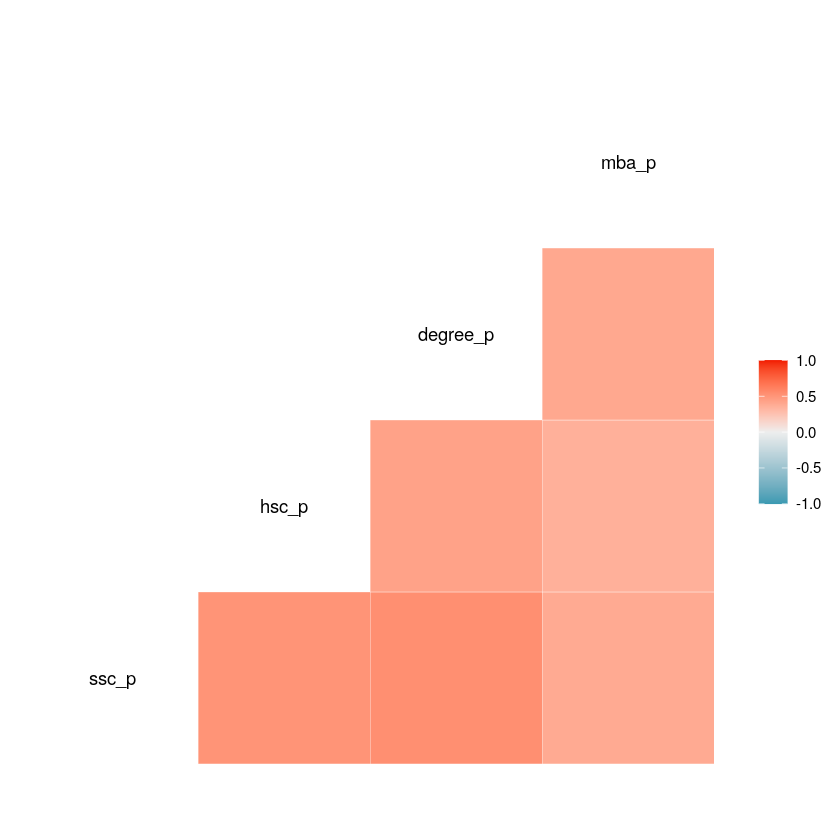

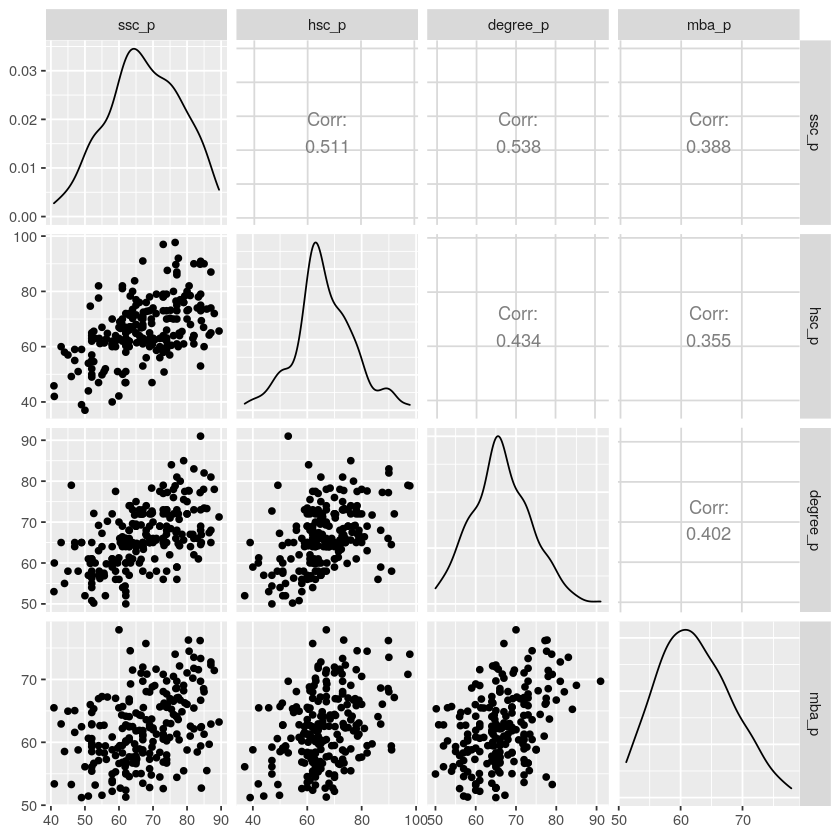

In [18]:
# Correlation among numeric columns
placement.mlr %>% cor()
# Correlation Visualisation
GGally::ggcorr(placement.mlr)
GGally::ggpairs(placement.mlr)

## Dividing the data into training and validation data sets
The data is randomly divided into mostly two subsets- training and validation/test. The proportion of training dataset is usually between 70% to 80%. The training data is used for developing the model and the validation data is used for model validation and selection. 


In [19]:
# Train and Test data
library(caTools) # to split data into train and test
set.seed(1001)
sample <- sample.split(placement.mlr$mba_p, SplitRatio = 0.80)
train = subset(placement.mlr, sample == TRUE)
test = subset(placement.mlr, sample == FALSE)

<a id="subsection-four"></a>
## MLR Model
The function lm() can be used to determine the partial regression coefficients of the linear model. The statistical summary of the model can be displayed using the function summary().


In [20]:
# MLR model
mlrmodel <- lm(mba_p~., train)
mlrmodel

# Model assessment
summary(mlrmodel)



Call:
lm(formula = mba_p ~ ., data = train)

Coefficients:
(Intercept)        ssc_p        hsc_p     degree_p  
   36.01588      0.06284      0.12187      0.20870  



Call:
lm(formula = mba_p ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6099  -3.8684  -0.4067   3.3801  15.3298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.01588    3.66841   9.818  < 2e-16 ***
ssc_p        0.06284    0.04826   1.302  0.19469    
hsc_p        0.12187    0.04364   2.792  0.00584 ** 
degree_p     0.20870    0.06623   3.151  0.00193 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.2 on 168 degrees of freedom
Multiple R-squared:  0.2494,	Adjusted R-squared:  0.236 
F-statistic:  18.6 on 3 and 168 DF,  p-value: 1.814e-10


From the output, the estimated values of the parameters are
b0 = 36.016;  b1 = 0.063; b2 = 0.122; and b3 = 0.209

## Regression equation: 
The regression model is given by-
* mba_p = b0 + b1*ssc_p + b2*hsc_p + b3*degree_p
* mba_p = 36.016 + 0.063*ssc_p + 0.122*hsc_p + 0.209*degree_p

## Interpretation of the coefficients: 
The partial regression coefficient provides the change in the response variable for a unit change in the explanatory variable, when all other explanatory variables are kept constant or controlled.
For every one percentage increase in SSC, the MBA percent will increase by 0.063% provided all other variables are held constant.<br>
Since the unit of measurement of all the explanatory variables is same, we can say that the Degree percentage has a higher impact on the MBA percentage as compared to others.<br>
Note: If the unit of measurement of the explanatory variables is different, we have to derive the standardised regression coefficients to compare the impact.<br>

<a id="subsection-five"></a>
## Validation of the Multiple Regression Model

### 1.	Validation of the overall regression model: F-Test
The research question that we are answering here is, does the regression model contain at least one predictor variable useful in predicting the response variable.
Analysis of Variance (ANOVA) is used to validate the overall regression model. The null and alternative hypotheses are stated as-
    * Null: b0 = b1 = b2 = b3 = 0
    * Alternative: Not all coefficients are zero

In our example, it can be seen that p-value of the F-statistic is < 0.05, which is highly significant and hence we reject the null hypothesis. This means that, at least one of the predictor variables is significantly related to the response variable.

The statement in alternative hypothesis is that not all the beta’s are zero, that is, some of the coefficients may be zero. This is the reason why we have to do the       t-Test to check the existence of statistically significant relationship between the individual explanatory variables and the response variable.
Note: We usually don’t worry about the p-value for Constant. It has to do with the “intercept” of the model and seldom has any practical meaning unless it makes sense for all the independent variables to be zero simultaneously.
	
### 2.	Statistical significance of individual variables in MLR: t-Test
Within a MLR model, we may want to know whether a particular independent variable is making a useful contribution to the model. That is, given the presence of the other independent variables in the model, does a particular variable help us predict or explain the dependent variable? <br>
For a given independent variable, the t-statistic evaluates whether or not there is significant association between the independent and the dependent variable, that is, whether the beta coefficient of the independent variable is significantly different from zero.<br>
The null and alternative hypotheses in the case of individual independent variables (Xi) and the dependent variable (Y) is stated as-
    * Null: There is no relationship between independent variable (Xi) and dependent variable Y (bi = 0)
    * Alternative: There is a relationship between independent variable (Xi) and dependent variable Y (bi ≠ 0)

When we cannot reject the null hypothesis for a particular independent variable in the above, we should say that we do not need that variable (say X1) in the model given that variables X2 and X3 will remain in the model.<br>
In our example, we find that SSC percentage is not significant at 0.05 alpha. This means that for a fixed HSC percentage and Degree percentage, changes in the SSC percentage will not significantly affect MBA percentage.

If we remove ssc_p from the model, we will have the regression equation as below.


In [21]:
# Remove insignificant independent variable
mlrmodel1 <- lm(mba_p ~ hsc_p + degree_p, train)
summary(mlrmodel1)


Call:
lm(formula = mba_p ~ hsc_p + degree_p, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9704 -3.9161 -0.2126  3.3077 14.7152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.43931    3.66148   9.952  < 2e-16 ***
hsc_p        0.14214    0.04085   3.479 0.000639 ***
degree_p     0.24589    0.05988   4.107 6.24e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.21 on 169 degrees of freedom
Multiple R-squared:  0.2418,	Adjusted R-squared:  0.2328 
F-statistic: 26.95 on 2 and 169 DF,  p-value: 6.956e-11


The regression model is given by- <br>
mba_p = 36.439 + 0.142*hsc_p + 0.246*degree_p<br>

A good regression model should include only significant independent variables. It is not always clear what will happen when we add or remove variables from a model. Therefore, we should not consider dropping all insignificant variables at one time, but rather take a more structured approach. Automated methods like forward selection, backward elimination, stepwise regression, and best subsets methods facilitate this process. Such procedures ensure that only statistically significant variables for a given alpha are include in the model.

### 3.	Coefficient of Multiple Determination (R-Square) and adjusted R-square
R-square measures the proportion of variation in the dependent variable explained by the model. A problem with R-square is that it will always increase when more variables are added to the model even when there is no statistically significant relationship between the independent variable and the dependent variable. A solution to this is to adjust the value of R-square by taking into account the number of predictors. The Adjusted R-square reflects both the number of independent variables and the sample size and may increase or decrease when an independent variable is added or dropped, thus giving an indication of the value of adding or removing the independent variables in the model. An increase in Adjusted R-square indicates that the model has improved. The Adjusted R-square value will always be less than or equal to R-square value. <br>
In our example, the Adjusted R-square of 0.2328 means that 23.28% of the variability in MBA percentage is explained by the model. (This is better than the    R-square of approximately 16% in the SLR model)<br>

<a id="subsection-six"></a>
### 4.	Residual analysis
Residual analysis is important for checking assumptions about the functional form of the regression model, normal distribution of the residuals and homoscedasticity. 


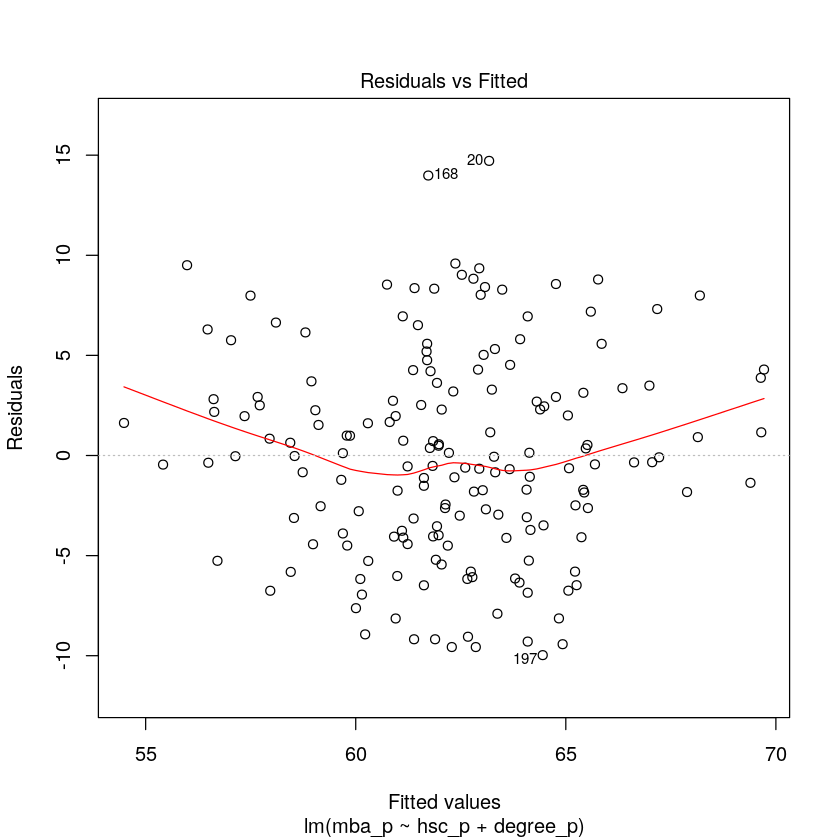

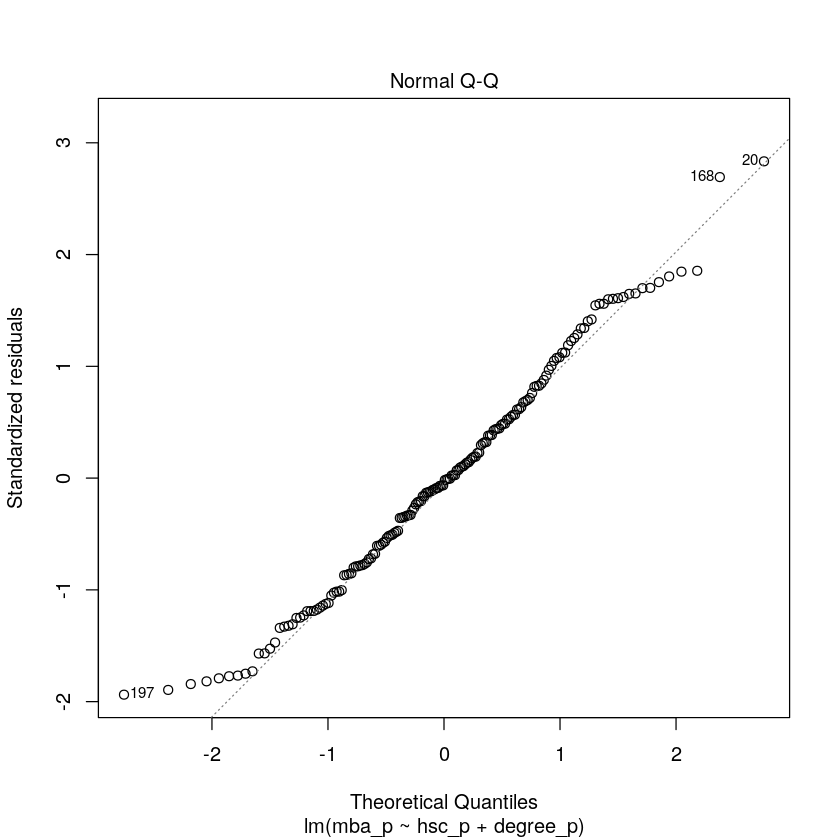

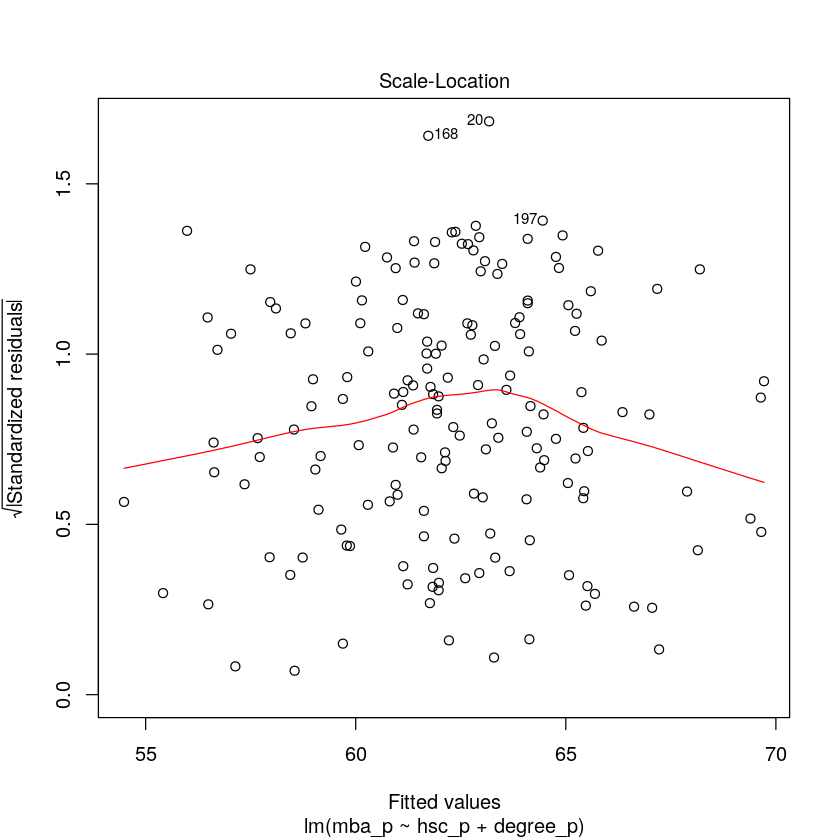

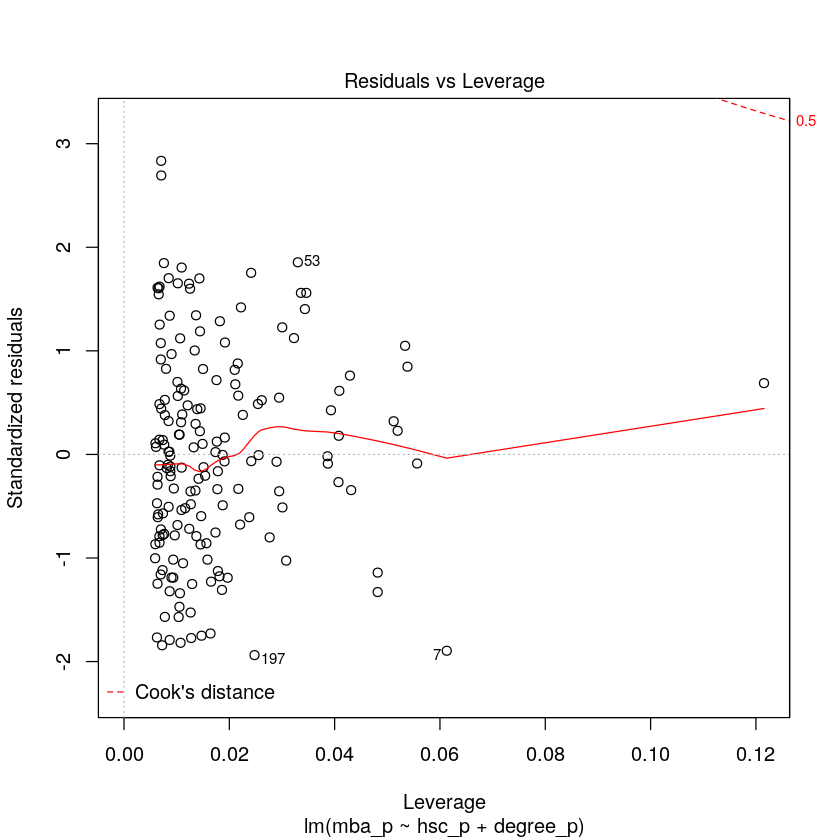

In [22]:
# Residual analysis
plot(mlrmodel1)


In our example, based on the plots we can infer that all the assumptions are satisfied and the data don’t present any outliers and influential observations in the MLR model.

### 5.	Multi-collinearity and Variance Inflation Factor
When the data set has a large number of independent variables, it is possible that few of these independent variables may be highly correlated. Existence of high correlation between independent variables is called multi-collinearity. Presence of multi-collinearity can destabilise the MLR model. Due to presence of multi-collinearity it is possible that a statistically significant variable may be labelled as insignificant on account of inflated p-value or the sign of a regression coefficient may change. Thus, it is necessary to identify the presence of multi-collinearity and take corrective action. <br>
Multi-collinearity can be assessed by computing a score called the variance inflation factor (VIF) for each independent variable. The smallest possible value of VIF is one (absence of multi-collinearity). As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problem. VIF greater than this requires further investigation to assess the impact of multi-collinearity. Remedies to handle multi-collinearity include using Principal Component Analysis (PCA), Ridge regression and LASSO regression. <br>

The R function vif() [car package] can be used to detect multi-collinearity in a regression model.
In our example, the VIF score is within limit. 


In [23]:
# VIF
car::vif(mlrmodel1)


hsc_p degree_p 
1.275507 1.275507

<a id="subsection-seven"></a>
## Making predictions on the validation dataset

After the model is built and has passed all diagnostic tests, we can apply the model on the validation dataset to predict.


In [24]:
# Prediction on test data
mbapred <- predict(mlrmodel1, test)
data.frame(test$mba_p, mbapred)

,test.mba_p,mbapred
,<dbl>,<dbl>
1,58.80,63.63557
6,51.58,60.05383
13,65.04,60.23972
16,64.66,64.06608
23,68.81,62.84190
26,65.33,56.54373
29,64.15,63.91046
32,58.32,59.95544
33,62.21,64.27961


<a id="subsection-eight"></a>
## Cross-validation

How do we know that an estimated regression model is generalizable beyond the sample data used to fit it? One way is to partition the sample data into a training (or model-building) set, which we can use to develop the model, and a validation (or prediction) set, which is used to evaluate the predictive ability of the model. This is called cross-validation. Cross-validation refers to a set of methods for measuring the performance of a given predictive model on new test data sets.<br>
The different cross-validation methods for assessing model performance are
* 	The validation set approach
* 	Leave-one-out cross-validation
* 	k-fold cross-validation
* 	Repeated k-fold cross-validation

Validation set approach involves randomly dividing the available set of observations into two parts, a training set and a validation set (hold-out set). The model is fit on the training set, and the fitted model is used to predict the responses for the observations in the validation set. The resulting validation set error rate – typically assessed using Root Mean Square Error (RMSE) provides an estimate of the test error rate.

* Sum of Square Errors (SSE) = ∑〖(Yi- Yi(hat))〗^2

* Mean Square Error (MSE) = SSE/n

* Root Mean Square Error (RMSE) = √MSE

(Note: R calls this as Residual Standard Error (RSE). RSE, also known as the model sigma, is a variant of the RMSE adjusted for the number of predictors in the model. Instead of n in the denominator in the MSE formula, it will be the degrees of freedom which is n-p-1 where p is the number of predictors.
The lower the RSE, the better the model. In practice, the difference between RMSE and RSE is very small, particularly for large multivariate data.)

If the predictions obtained using the model are very close to the actual values in the validation set, then RMSE will be small, and we can conclude that the model fits the validation set very well. The lower the RMSE, the better the model.
Dividing the RMSE by the average value of the outcome variable will give us the prediction error rate, which should be as small as possible


In [25]:
# cross-validation
mse <- mean((test$mba_p - mbapred)^2)
rmse <- sqrt(mse)
rmse

[1] 5.371499

In [26]:
prederror <- rmse/mean(test$mba_p)
prederror

[1] 0.08626368

# [Part 8:Logistic Regression using R](https://www.kaggle.com/benroshan/part-8-logistic-regression-using-r?scriptVersionId=38235472)- Click here to start learning
# Please hit an upvote if you like this kernel!